### Moving Average

In [1]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt

#### Connect mysql

In [2]:
conn = pymysql.connect(
    host='192.168.100.120',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)

curs = conn.cursor()

set_day1 = '2019-08-01'
set_day2 = '2019-10-25'



sql_peak = "SELECT DataSavedTime, Area FROM HisAvgHour \
    WHERE DefColumn = 'Item005' AND DefTable = 'HisItemCurr' AND DataSavedTime \
    BETWEEN '"+set_day1+"' and '"+set_day2+"' ORDER BY DataSavedTime ASC"
print(sql_peak)
curs.execute(sql_peak)
rows_peak=curs.fetchall()


data_peak = list(rows_peak)
df_peak = pd.DataFrame(data_peak)

df_peak.columns = ['DataSavedTime', 'Value']

print(df_peak)
print(len(df_peak))
conn.close()
print(df_peak['Value'].isna().sum())
print(df_peak.tail())

SELECT DataSavedTime, Area FROM HisAvgHour     WHERE DefColumn = 'Item005' AND DefTable = 'HisItemCurr' AND DataSavedTime     BETWEEN '2019-08-01' and '2019-10-25' ORDER BY DataSavedTime ASC
          DataSavedTime  Value
0   2019-08-27 12:00:00   8419
1   2019-08-27 13:00:00   9018
2   2019-08-27 14:00:00   6152
3   2019-08-27 15:00:00   8970
4   2019-08-27 16:00:00   7592
..                  ...    ...
901 2019-10-24 20:00:00   7740
902 2019-10-24 21:00:00   8275
903 2019-10-24 22:00:00   5885
904 2019-10-24 23:00:00   5211
905 2019-10-25 00:00:00   4528

[906 rows x 2 columns]
906
0
          DataSavedTime  Value
901 2019-10-24 20:00:00   7740
902 2019-10-24 21:00:00   8275
903 2019-10-24 22:00:00   5885
904 2019-10-24 23:00:00   5211
905 2019-10-25 00:00:00   4528


In [3]:
ma12 = df_peak['Value'].rolling(window=12).mean()
ma24 = df_peak['Value'].rolling(window=24).mean()
ma120 = df_peak['Value'].rolling(window=120).mean()
ma720 = df_peak['Value'].rolling(window=720).mean()
print(ma12.tail())
print(ma24.tail())
print(ma120.tail())
print(ma720.tail())


901    9547.083333
902    9430.250000
903    9113.333333
904    8789.000000
905    8451.500000
Name: Value, dtype: float64
901    8487.416667
902    8462.875000
903    8337.875000
904    8186.625000
905    8004.250000
Name: Value, dtype: float64
901    7987.241667
902    8011.808333
903    7996.650000
904    7968.316667
905    7925.225000
Name: Value, dtype: float64
901    9956.752778
902    9956.868056
903    9954.856944
904    9949.668056
905    9944.162500
Name: Value, dtype: float64


In [4]:
new_df_peak = df_peak
new_df_peak.insert(len(df_peak.columns), "MA12", ma12)
new_df_peak.insert(len(new_df_peak.columns), "MA24", ma24)
new_df_peak.insert(len(new_df_peak.columns), "MA120", ma120)
new_df_peak.insert(len(new_df_peak.columns), "MA720", ma720)
print(new_df_peak.tail(5))

          DataSavedTime  Value         MA12         MA24        MA120  \
901 2019-10-24 20:00:00   7740  9547.083333  8487.416667  7987.241667   
902 2019-10-24 21:00:00   8275  9430.250000  8462.875000  8011.808333   
903 2019-10-24 22:00:00   5885  9113.333333  8337.875000  7996.650000   
904 2019-10-24 23:00:00   5211  8789.000000  8186.625000  7968.316667   
905 2019-10-25 00:00:00   4528  8451.500000  8004.250000  7925.225000   

           MA720  
901  9956.752778  
902  9956.868056  
903  9954.856944  
904  9949.668056  
905  9944.162500  


#### Plot!

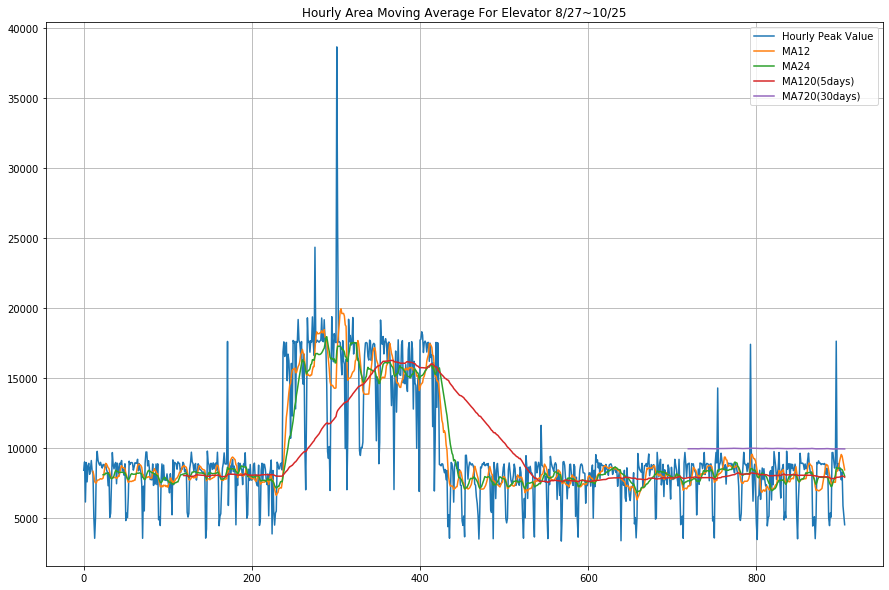

In [7]:
plt.figure(figsize=(15,10))
plt.plot(new_df_peak.index, new_df_peak['Value'], label="Hourly Peak Value")
plt.plot(new_df_peak.index, new_df_peak['MA12'], label="MA12")
plt.plot(new_df_peak.index, new_df_peak['MA24'], label="MA24")
plt.plot(new_df_peak.index, new_df_peak['MA120'], label="MA120(5days)")
plt.plot(new_df_peak.index, new_df_peak['MA720'], label="MA720(30days)")
plt.legend(loc='best')
plt.title("Hourly Area Moving Average For Elevator 8/27~10/25")
plt.grid()
plt.show()

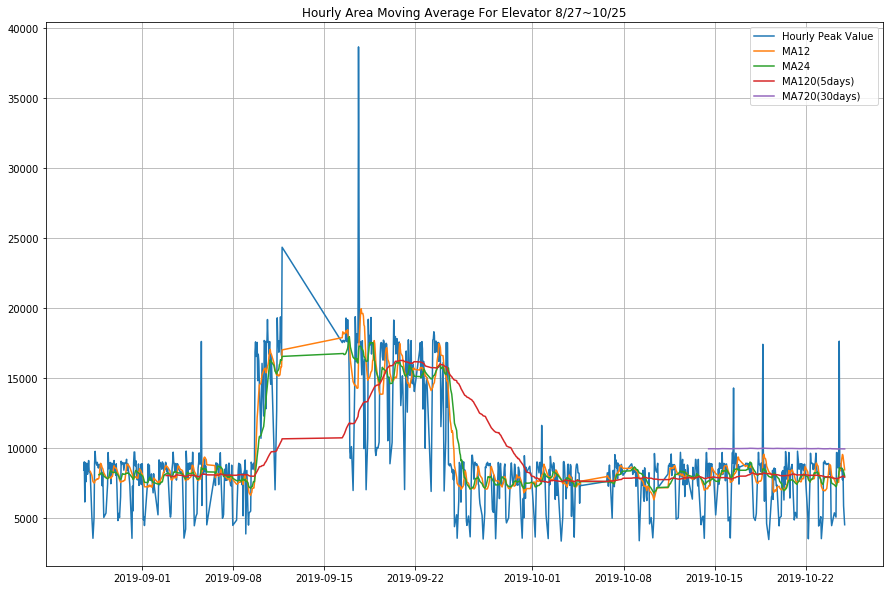

In [8]:
plt.figure(figsize=(15,10))
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['Value'], label="Hourly Peak Value")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA12'], label="MA12")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA24'], label="MA24")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA120'], label="MA120(5days)")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA720'], label="MA720(30days)")
plt.legend(loc='best')
plt.title("Hourly Area Moving Average For Elevator 8/27~10/25")
plt.grid()
plt.show()